# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 양식음식점

In [10]:
# 양식음식점만 남기기
ap_wfood = df_ap_quarter[df_ap_quarter.업종명 == '양식음식점'].reset_index().drop('index', axis=1)
ap_wfood

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,외식,식사류,양식음식점,압구정동,25499817180,303,13,12
1,2017-2,외식,식사류,양식음식점,압구정동,26698024549,301,10,12
2,2017-3,외식,식사류,양식음식점,압구정동,27541994924,306,14,9
3,2017-4,외식,식사류,양식음식점,압구정동,31308246219,305,9,10
4,2018-1,외식,식사류,양식음식점,압구정동,29115910548,287,3,21
5,2018-2,외식,식사류,양식음식점,압구정동,30005896477,289,16,14
6,2018-3,외식,식사류,양식음식점,압구정동,29727329695,288,12,13
7,2018-4,외식,식사류,양식음식점,압구정동,40167642895,280,8,14
8,2019-1,외식,식사류,양식음식점,압구정동,18325699065,271,3,12
9,2019-2,외식,식사류,양식음식점,압구정동,16944640704,271,10,10


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [11]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_wfood['성장성'] = ap_wfood['분기당_매출_금액'] / ap_wfood['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_wfood['성장성'][0] = 1

ap_wfood

<ipython-input-11-170afc20f6f2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_wfood['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,외식,식사류,양식음식점,압구정동,25499817180,303,13,12,1.000000
1,2017-2,외식,식사류,양식음식점,압구정동,26698024549,301,10,12,1.046989
2,2017-3,외식,식사류,양식음식점,압구정동,27541994924,306,14,9,1.031612
3,2017-4,외식,식사류,양식음식점,압구정동,31308246219,305,9,10,1.136746
4,2018-1,외식,식사류,양식음식점,압구정동,29115910548,287,3,21,0.929976
5,2018-2,외식,식사류,양식음식점,압구정동,30005896477,289,16,14,1.030567
6,2018-3,외식,식사류,양식음식점,압구정동,29727329695,288,12,13,0.990716
7,2018-4,외식,식사류,양식음식점,압구정동,40167642895,280,8,14,1.351203
8,2019-1,외식,식사류,양식음식점,압구정동,18325699065,271,3,12,0.456230
9,2019-2,외식,식사류,양식음식점,압구정동,16944640704,271,10,10,0.924638


In [12]:
# 개업률, 폐업률, 순점포증감률 추가

ap_wfood['개업률'] = (ap_wfood['개업점포수'] / ap_wfood['총 점포수']) * 100
ap_wfood['폐업률'] = (ap_wfood['폐업점포수'] / ap_wfood['총 점포수']) * 100
ap_wfood['순점포증감률'] = ((ap_wfood['개업점포수'] - ap_wfood['폐업점포수']) / ap_wfood['총 점포수']) * 100

ap_wfood

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,외식,식사류,양식음식점,압구정동,25499817180,303,13,12,1.000000,4.290429,3.960396,0.330033
1,2017-2,외식,식사류,양식음식점,압구정동,26698024549,301,10,12,1.046989,3.322259,3.986711,-0.664452
2,2017-3,외식,식사류,양식음식점,압구정동,27541994924,306,14,9,1.031612,4.575163,2.941176,1.633987
3,2017-4,외식,식사류,양식음식점,압구정동,31308246219,305,9,10,1.136746,2.950820,3.278689,-0.327869
4,2018-1,외식,식사류,양식음식점,압구정동,29115910548,287,3,21,0.929976,1.045296,7.317073,-6.271777
5,2018-2,외식,식사류,양식음식점,압구정동,30005896477,289,16,14,1.030567,5.536332,4.844291,0.692042
6,2018-3,외식,식사류,양식음식점,압구정동,29727329695,288,12,13,0.990716,4.166667,4.513889,-0.347222
7,2018-4,외식,식사류,양식음식점,압구정동,40167642895,280,8,14,1.351203,2.857143,5.000000,-2.142857
8,2019-1,외식,식사류,양식음식점,압구정동,18325699065,271,3,12,0.456230,1.107011,4.428044,-3.321033
9,2019-2,외식,식사류,양식음식점,압구정동,16944640704,271,10,10,0.924638,3.690037,3.690037,0.000000


In [13]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 양식음식점만 남기기
gangnam_wfood = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '양식음식점'].reset_index()

################################################################################################################################################################################################

ap_wfood['시장성'] = (ap_wfood['분기당_매출_금액'] / ap_wfood['총 점포수']) - (gangnam_wfood['분기당_매출_금액'] / gangnam_wfood['총 점포수'])

ap_wfood = ap_wfood[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_wfood

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,양식음식점,25499817180,1.000000,0.330033,-8.109460e+06
1,2017-2,양식음식점,26698024549,1.046989,-0.664452,-4.152999e+06
2,2017-3,양식음식점,27541994924,1.031612,1.633987,-3.363590e+06
3,2017-4,양식음식점,31308246219,1.136746,-0.327869,7.623340e+06
4,2018-1,양식음식점,29115910548,0.929976,-6.271777,1.007280e+07
5,2018-2,양식음식점,30005896477,1.030567,0.692042,9.524570e+06
6,2018-3,양식음식점,29727329695,0.990716,-0.347222,8.223603e+06
7,2018-4,양식음식점,40167642895,1.351203,-2.142857,3.150104e+07
8,2019-1,양식음식점,18325699065,0.456230,-3.321033,5.932966e+05
9,2019-2,양식음식점,16944640704,0.924638,0.000000,6.383939e+05


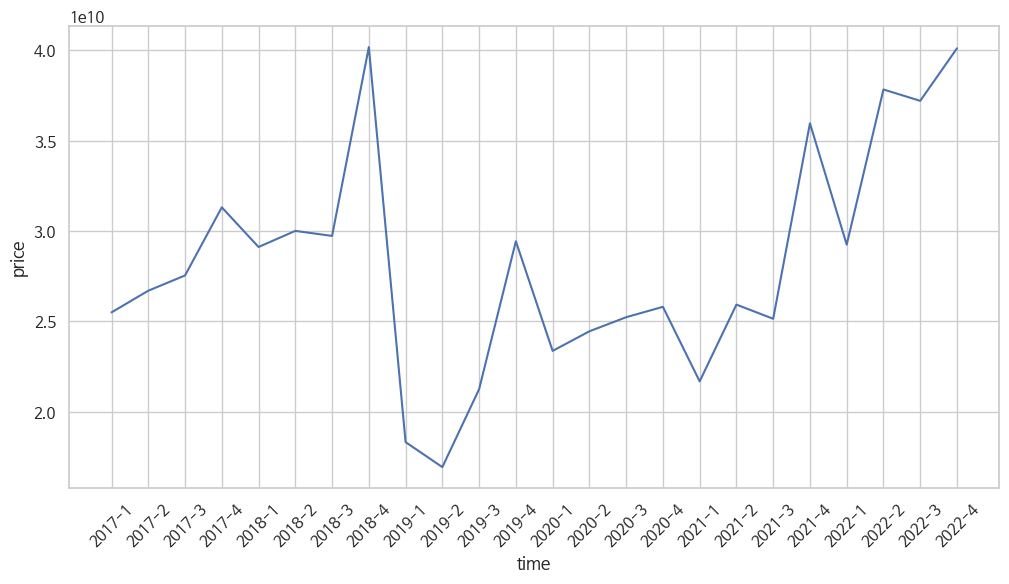

In [14]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_wfood['분기'], y=ap_wfood['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [15]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_wfood[['성장성', '시장성', '순점포증감률']]
y = ap_wfood.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -8.109460e+06  0.330033
1   1.046989 -4.152999e+06 -0.664452
2   1.031612 -3.363590e+06  1.633987
3   1.136746  7.623340e+06 -0.327869
4   0.929976  1.007280e+07 -6.271777
5   1.030567  9.524570e+06  0.692042
6   0.990716  8.223603e+06 -0.347222
7   1.351203  3.150104e+07 -2.142857
8   0.456230  5.932966e+05 -3.321033
9   0.924638  6.383939e+05  0.000000
10  1.254277  8.803695e+06 -1.886792
11  1.384806  4.407477e+07  1.102941
12  0.794059  2.889960e+07 -2.166065
13  1.046345  3.241585e+07 -2.973978
14  1.031883  3.624241e+07  0.000000
15  1.022717  3.712767e+07  2.536232
16  0.840294  2.852631e+07  2.816901
17  1.195756  3.216208e+07  4.054054
18  0.969761  3.232213e+07  4.516129
19  1.429833  4.151689e+07  0.961538
20  0.813413  3.498298e+07  2.187500
21  1.293344  4.462166e+07  2.476780
22  0.983390  4.109036e+07  1.223242
23  1.078052  4.360884e+07  1.506024
---------------------------------------------------------------------------

In [16]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [17]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [18]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [19]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.5414528  0.93303184 0.6947612 ]
 [0.63868141 0.98079263 0.72097412]]


In [20]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [21]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [22]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2984
Epoch 1: val_loss improved from inf to 0.21207, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2984 - val_loss: 0.2121
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2973
Epoch 2: val_loss improved from 0.21207 to 0.21087, saving model to stock_model.h5
1/1 [==============================] - 0s 124ms/step - loss: 0.2973 - val_loss: 0.2109
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2962
Epoch 3: val_loss improved from 0.21087 to 0.20967, saving model to stock_model.h5
1/1 [==============================] - 0s 121ms/step - loss: 0.2962 - val_loss: 0.2097
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2952
Epoch 4: val_loss improved from 0.20967 to 0.20848, saving model to stock_model.h5
1/1 [==============================] - 0s 134ms/step - loss: 0.2952 - val_loss: 0.2085
Epoch 5/300
1/1 [==============

In [23]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 867ms/step
[[0.4586031 ]
 [0.44239587]
 [0.41153082]
 [0.4518708 ]]


In [24]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.529696,0.458603
2022-2,0.899117,0.442396
2022-3,0.872064,0.411531
2022-4,0.997082,0.451871


In [25]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_wfood의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.529696,0.458603,29245783636,2.759478e+10,1.651003e+09
2022-2,0.899117,0.442396,37824847132,2.721840e+10,1.060645e+10
2022-3,0.872064,0.411531,37196592787,2.650162e+10,1.069497e+10
2022-4,0.997082,0.451871,40099879756,2.743844e+10,1.266144e+10


In [26]:
df_test = df_test.reset_index()

### 결과

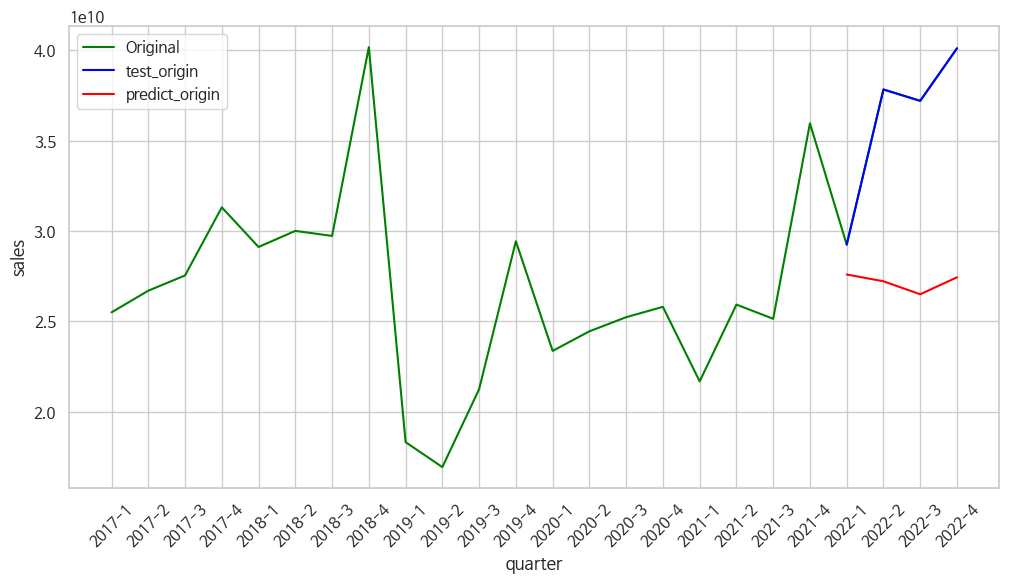

In [27]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [28]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     8.903465e+09
std      4.927144e+09
min      1.651003e+09
25%      8.367585e+09
50%      1.065071e+10
75%      1.118659e+10
max      1.266144e+10
dtype: float64

In [29]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.40311554]]
--------------------------------------------------------------------------------
예측된 매출  : 26306193408.0 


## 23년 1분기 성장성 예측

In [30]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_wfood[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_wfood.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

      분기당_매출_금액           시장성    순점포증감률
0   25499817180 -8.109460e+06  0.330033
1   26698024549 -4.152999e+06 -0.664452
2   27541994924 -3.363590e+06  1.633987
3   31308246219  7.623340e+06 -0.327869
4   29115910548  1.007280e+07 -6.271777
5   30005896477  9.524570e+06  0.692042
6   29727329695  8.223603e+06 -0.347222
7   40167642895  3.150104e+07 -2.142857
8   18325699065  5.932966e+05 -3.321033
9   16944640704  6.383939e+05  0.000000
10  21253272801  8.803695e+06 -1.886792
11  29431650705  4.407477e+07  1.102941
12  23370462681  2.889960e+07 -2.166065
13  24453576458  3.241585e+07 -2.973978
14  25233239609  3.624241e+07  0.000000
15  25806460650  3.712767e+07  2.536232
16  21685021863  2.852631e+07  2.816901
17  25929984666  3.216208e+07  4.054054
18  25145877759  3.232213e+07  4.516129
19  35954414710  4.151689e+07  0.961538
20  29245783636  3.498298e+07  2.187500
21  37824847132  4.462166e+07  2.476780
22  37196592787  4.109036e+07  1.223242
23  40099879756  4.360884e+07  1.506024


In [31]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [32]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [33]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.87206434 0.93303184 0.6947612 ]
 [0.99708207 0.98079263 0.72097412]]


In [34]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [35]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4595
Epoch 1: val_loss improved from inf to 0.44571, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.4595 - val_loss: 0.4457
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4582
Epoch 2: val_loss improved from 0.44571 to 0.44399, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.4582 - val_loss: 0.4440
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4569
Epoch 3: val_loss improved from 0.44399 to 0.44226, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.4569 - val_loss: 0.4423
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4556
Epoch 4: val_loss improved from 0.44226 to 0.44054, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.4556 - val_loss: 0.4405
Epoch 5/300
1/1 [=================

In [37]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.7574613 ]
 [0.73725647]
 [0.7528032 ]
 [0.8149818 ]]


In [38]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.366867,0.757461
2022-2,0.859810,0.737256
2022-3,0.541453,0.752803
2022-4,0.638681,0.814982


In [39]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 3].values       # 성장성이 ap_wfood의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.366867,0.757461,0.813413,1.193697,-0.380284
2022-2,0.859810,0.737256,1.293344,1.174025,0.119318
2022-3,0.541453,0.752803,0.983390,1.189162,-0.205771
2022-4,0.638681,0.814982,1.078052,1.249699,-0.171647


### 결과

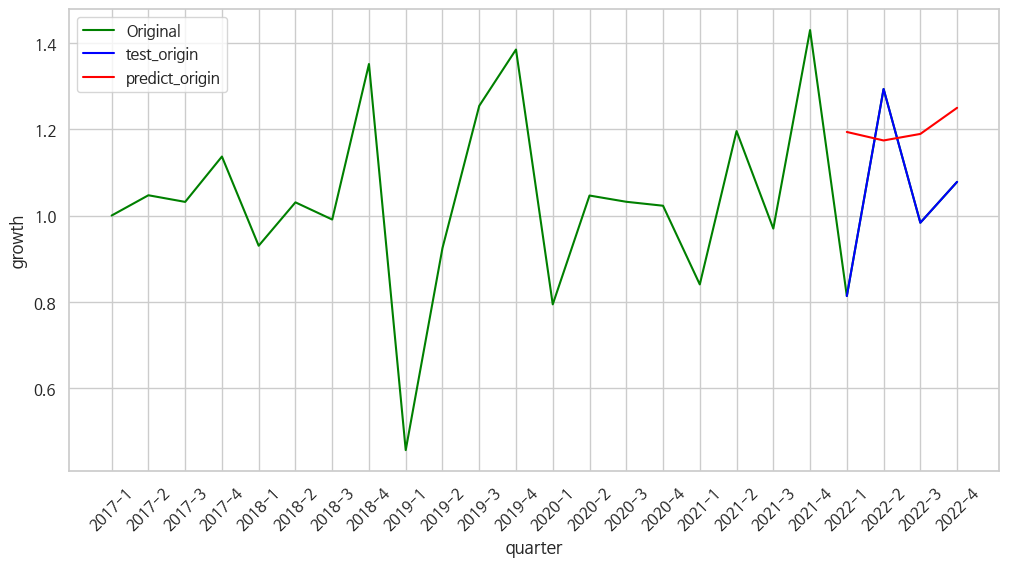

In [40]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [41]:
## error의 요약 통계량
error.describe()

count    4.000000
mean    -0.159596
std      0.207182
min     -0.380284
25%     -0.249400
50%     -0.188709
75%     -0.098905
max      0.119318
dtype: float64

In [42]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 26ms/step
[[0.78408575]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.219618558883667 


## 23년 1분기 시장성 예측

In [43]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_wfood[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_wfood.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액    순점포증감률
0   1.000000  25499817180  0.330033
1   1.046989  26698024549 -0.664452
2   1.031612  27541994924  1.633987
3   1.136746  31308246219 -0.327869
4   0.929976  29115910548 -6.271777
5   1.030567  30005896477  0.692042
6   0.990716  29727329695 -0.347222
7   1.351203  40167642895 -2.142857
8   0.456230  18325699065 -3.321033
9   0.924638  16944640704  0.000000
10  1.254277  21253272801 -1.886792
11  1.384806  29431650705  1.102941
12  0.794059  23370462681 -2.166065
13  1.046345  24453576458 -2.973978
14  1.031883  25233239609  0.000000
15  1.022717  25806460650  2.536232
16  0.840294  21685021863  2.816901
17  1.195756  25929984666  4.054054
18  0.969761  25145877759  4.516129
19  1.429833  35954414710  0.961538
20  0.813413  29245783636  2.187500
21  1.293344  37824847132  2.476780
22  0.983390  37196592787  1.223242
23  1.078052  40099879756  1.506024
--------------------------------------------------------------------------------
             시장성
0 

In [44]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [45]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [46]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.5414528  0.87206434 0.6947612 ]
 [0.63868141 0.99708207 0.72097412]]


In [47]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [48]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2316
Epoch 1: val_loss improved from inf to 0.67018, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2316 - val_loss: 0.6702
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2307
Epoch 2: val_loss improved from 0.67018 to 0.66811, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2307 - val_loss: 0.6681
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2297
Epoch 3: val_loss improved from 0.66811 to 0.66604, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.2297 - val_loss: 0.6660
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2288
Epoch 4: val_loss improved from 0.66604 to 0.66398, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2288 - val_loss: 0.6640
Epoch 5/300
1/1 [================

In [50]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 880ms/step
[[0.48517478]
 [0.4650368 ]
 [0.43271512]
 [0.47561237]]


In [51]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.817211,0.485175
2022-2,1.000000,0.465037
2022-3,0.933032,0.432715
2022-4,0.980793,0.475612


In [52]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 5].values       # 시장성이 ap_wfood의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.817211,0.485175,3.498298e+07,17474350.0,1.750863e+07
2022-2,1.000000,0.465037,4.462166e+07,16412452.0,2.820921e+07
2022-3,0.933032,0.432715,4.109036e+07,14708093.0,2.638226e+07
2022-4,0.980793,0.475612,4.360884e+07,16970114.0,2.663872e+07


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


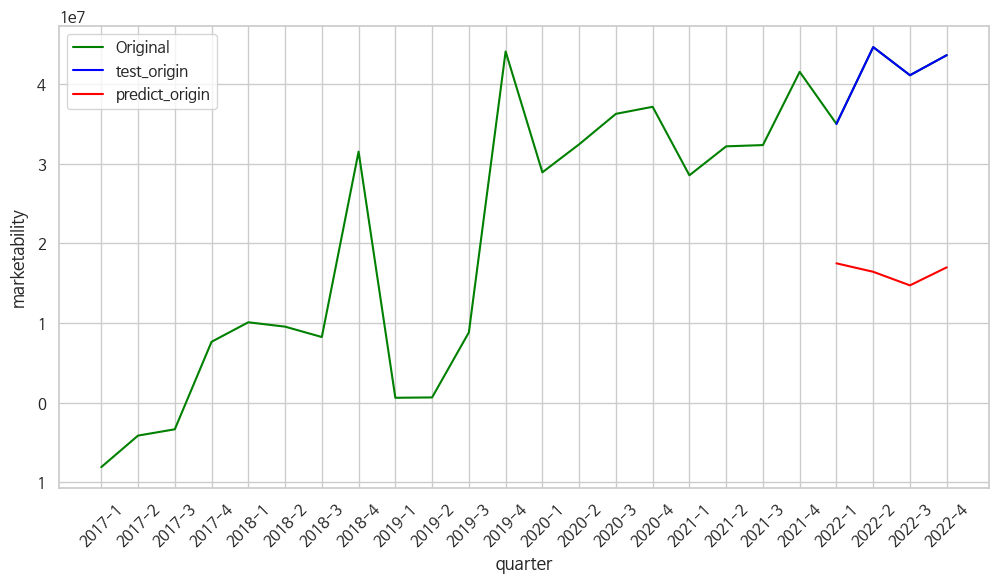

In [53]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [54]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.468471e+07
std      4.851738e+06
min      1.750863e+07
25%      2.416385e+07
50%      2.651049e+07
75%      2.703134e+07
max      2.820921e+07
dtype: float64

In [55]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 31ms/step
[[0.42329597]]
--------------------------------------------------------------------------------
예측된 시장성  : 14211411.0 


## 23년 1분기 순점포증감률 예측

In [56]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_wfood[['성장성', '분기당_매출_금액', '시장성']]
y = ap_wfood.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액           시장성
0   1.000000  25499817180 -8.109460e+06
1   1.046989  26698024549 -4.152999e+06
2   1.031612  27541994924 -3.363590e+06
3   1.136746  31308246219  7.623340e+06
4   0.929976  29115910548  1.007280e+07
5   1.030567  30005896477  9.524570e+06
6   0.990716  29727329695  8.223603e+06
7   1.351203  40167642895  3.150104e+07
8   0.456230  18325699065  5.932966e+05
9   0.924638  16944640704  6.383939e+05
10  1.254277  21253272801  8.803695e+06
11  1.384806  29431650705  4.407477e+07
12  0.794059  23370462681  2.889960e+07
13  1.046345  24453576458  3.241585e+07
14  1.031883  25233239609  3.624241e+07
15  1.022717  25806460650  3.712767e+07
16  0.840294  21685021863  2.852631e+07
17  1.195756  25929984666  3.216208e+07
18  0.969761  25145877759  3.232213e+07
19  1.429833  35954414710  4.151689e+07
20  0.813413  29245783636  3.498298e+07
21  1.293344  37824847132  4.462166e+07
22  0.983390  37196592787  4.109036e+07
23  1.078052  40099879756  4.360884e+07


In [57]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [58]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [59]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.5414528  0.87206434 0.93303184]
 [0.63868141 0.99708207 0.98079263]]


In [60]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [61]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2985
Epoch 1: val_loss improved from inf to 0.57295, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2985 - val_loss: 0.5729
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2974
Epoch 2: val_loss improved from 0.57295 to 0.57113, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.2974 - val_loss: 0.5711
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2963
Epoch 3: val_loss improved from 0.57113 to 0.56932, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2963 - val_loss: 0.5693
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2952
Epoch 4: val_loss improved from 0.56932 to 0.56752, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2952 - val_loss: 0.5675
Epoch 5/300
1/1 [=================

In [63]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 829ms/step
[[0.5984322 ]
 [0.68153095]
 [0.57651573]
 [0.70272887]]


In [64]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.784144,0.598432
2022-2,0.810960,0.681531
2022-3,0.694761,0.576516
2022-4,0.720974,0.702729


In [65]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_wfood의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.784144,0.598432,2.187500,0.184053,2.003447
2022-2,0.810960,0.681531,2.476780,1.080515,1.396265
2022-3,0.694761,0.576516,1.223242,-0.052379,1.275621
2022-4,0.720974,0.702729,1.506024,1.309196,0.196828


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


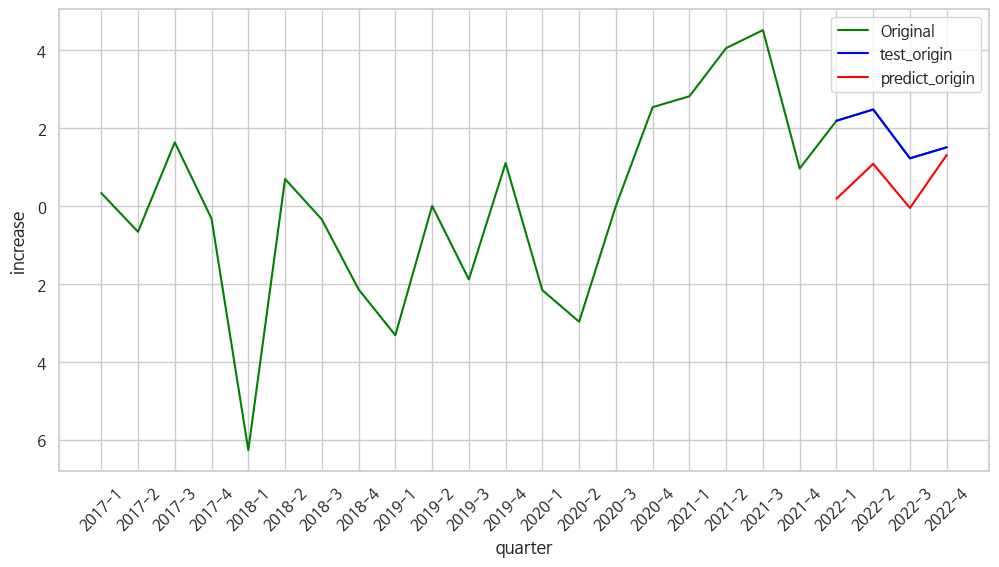

In [66]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [67]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.218040
std      0.751624
min      0.196828
25%      1.005923
50%      1.335943
75%      1.548061
max      2.003447
dtype: float64

In [68]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 32ms/step
[[0.63642484]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 0.5939143896102905 


## 원본 데이터에 예측값 추가하기

In [69]:
print(sales)
print(growth)
print(marketability)
print(increase)

26306193000.0
1.2196186
14211411.0
0.5939144


In [70]:
ap_wfood.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-70-511e9d16557b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_wfood.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [71]:
ap_wfood

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,양식음식점,2.549982e+10,1.000000,0.330033,-8.109460e+06
1,2017-2,양식음식점,2.669802e+10,1.046989,-0.664452,-4.152999e+06
2,2017-3,양식음식점,2.754199e+10,1.031612,1.633987,-3.363590e+06
3,2017-4,양식음식점,3.130825e+10,1.136746,-0.327869,7.623340e+06
4,2018-1,양식음식점,2.911591e+10,0.929976,-6.271777,1.007280e+07
5,2018-2,양식음식점,3.000590e+10,1.030567,0.692042,9.524570e+06
6,2018-3,양식음식점,2.972733e+10,0.990716,-0.347222,8.223603e+06
7,2018-4,양식음식점,4.016764e+10,1.351203,-2.142857,3.150104e+07
8,2019-1,양식음식점,1.832570e+10,0.456230,-3.321033,5.932966e+05
9,2019-2,양식음식점,1.694464e+10,0.924638,0.000000,6.383939e+05


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [72]:
### X / y 데이터 생성
X = ap_wfood[['성장성', '시장성', '순점포증감률']]
y = ap_wfood.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -8.109460e+06  0.330033
1   1.046989 -4.152999e+06 -0.664452
2   1.031612 -3.363590e+06  1.633987
3   1.136746  7.623340e+06 -0.327869
4   0.929976  1.007280e+07 -6.271777
5   1.030567  9.524570e+06  0.692042
6   0.990716  8.223603e+06 -0.347222
7   1.351203  3.150104e+07 -2.142857
8   0.456230  5.932966e+05 -3.321033
9   0.924638  6.383939e+05  0.000000
10  1.254277  8.803695e+06 -1.886792
11  1.384806  4.407477e+07  1.102941
12  0.794059  2.889960e+07 -2.166065
13  1.046345  3.241585e+07 -2.973978
14  1.031883  3.624241e+07  0.000000
15  1.022717  3.712767e+07  2.536232
16  0.840294  2.852631e+07  2.816901
17  1.195756  3.216208e+07  4.054054
18  0.969761  3.232213e+07  4.516129
19  1.429833  4.151689e+07  0.961538
20  0.813413  3.498298e+07  2.187500
21  1.293344  4.462166e+07  2.476780
22  0.983390  4.109036e+07  1.223242
23  1.078052  4.360884e+07  1.506024
24  1.219619  1.421141e+07  0.593914
--------------------------------------

In [73]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [74]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.63868141 0.98079263 0.72097412]
 [0.78408571 0.42329596 0.63642484]]


In [75]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [76]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [77]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2800
Epoch 1: val_loss improved from inf to 0.24128, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2800 - val_loss: 0.2413
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2790
Epoch 2: val_loss improved from 0.24128 to 0.23995, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2790 - val_loss: 0.2399
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2779
Epoch 3: val_loss improved from 0.23995 to 0.23862, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2779 - val_loss: 0.2386
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2769
Epoch 4: val_loss improved from 0.23862 to 0.23729, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.2769 - val_loss: 0.2373
Epoch 5/300
1/1 [=================

In [78]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.47028548]
 [0.4366278 ]
 [0.4803143 ]
 [0.42764705]]


In [79]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.899117,0.470285
2022-3,0.872064,0.436628
2022-4,0.997082,0.480314
2023-1,0.403116,0.427647


In [80]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_wfood의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.899117,0.470285,3.782485e+10,2.786608e+10,9.958766e+09
2022-3,0.872064,0.436628,3.719659e+10,2.708445e+10,1.011214e+10
2022-4,0.997082,0.480314,4.009988e+10,2.809898e+10,1.200090e+10
2023-1,0.403116,0.427647,2.630619e+10,2.687589e+10,-5.696963e+08


In [81]:
df_test = df_test.reset_index()

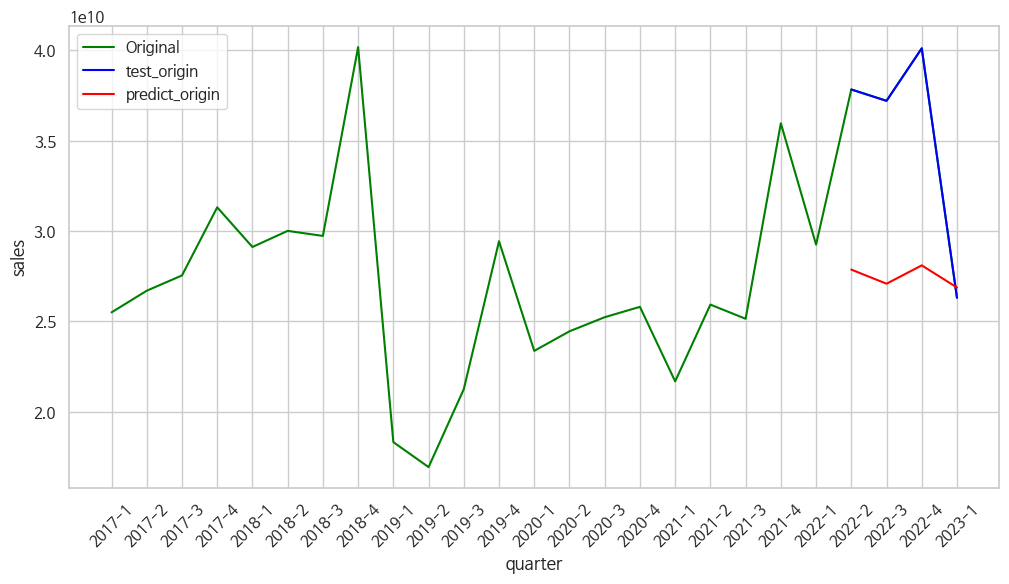

In [82]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [83]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     7.875528e+09
std      5.706219e+09
min     -5.696963e+08
25%      7.326650e+09
50%      1.003545e+10
75%      1.058433e+10
max      1.200090e+10
dtype: float64

In [84]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 27ms/step
[[0.44152182]]
--------------------------------------------------------------------------------
예측된 매출  : 27198103552.0 


### 성장성

In [85]:
### X / y 데이터 생성
X = ap_wfood[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_wfood.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.549982e+10 -8.109460e+06  0.330033
1   2.669802e+10 -4.152999e+06 -0.664452
2   2.754199e+10 -3.363590e+06  1.633987
3   3.130825e+10  7.623340e+06 -0.327869
4   2.911591e+10  1.007280e+07 -6.271777
5   3.000590e+10  9.524570e+06  0.692042
6   2.972733e+10  8.223603e+06 -0.347222
7   4.016764e+10  3.150104e+07 -2.142857
8   1.832570e+10  5.932966e+05 -3.321033
9   1.694464e+10  6.383939e+05  0.000000
10  2.125327e+10  8.803695e+06 -1.886792
11  2.943165e+10  4.407477e+07  1.102941
12  2.337046e+10  2.889960e+07 -2.166065
13  2.445358e+10  3.241585e+07 -2.973978
14  2.523324e+10  3.624241e+07  0.000000
15  2.580646e+10  3.712767e+07  2.536232
16  2.168502e+10  2.852631e+07  2.816901
17  2.592998e+10  3.216208e+07  4.054054
18  2.514588e+10  3.232213e+07  4.516129
19  3.595441e+10  4.151689e+07  0.961538
20  2.924578e+10  3.498298e+07  2.187500
21  3.782485e+10  4.462166e+07  2.476780
22  3.719659e+10  4.109036e+07  1.223242
23  4.009988e+10

In [86]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [87]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.99708207 0.98079263 0.72097412]
 [0.40311552 0.42329596 0.63642484]]


In [88]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [89]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4307
Epoch 1: val_loss improved from inf to 0.44902, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4307 - val_loss: 0.4490
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4294
Epoch 2: val_loss improved from 0.44902 to 0.44724, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.4294 - val_loss: 0.4472
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4282
Epoch 3: val_loss improved from 0.44724 to 0.44546, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.4282 - val_loss: 0.4455
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4269
Epoch 4: val_loss improved from 0.44546 to 0.44369, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.4269 - val_loss: 0.4437
Epoch 5/300
1/1 [================

In [91]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 813ms/step
[[0.68874794]
 [0.7031985 ]
 [0.7611377 ]
 [0.73303074]]


In [92]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.859810,0.688748
2022-3,0.541453,0.703198
2022-4,0.638681,0.761138
2023-1,0.784086,0.733031


In [93]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 3].values       # 성장성이 ap_wfood의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.859810,0.688748,1.293344,1.126797,0.166546
2022-3,0.541453,0.703198,0.983390,1.140867,-0.157476
2022-4,0.638681,0.761138,1.078052,1.197276,-0.119224
2023-1,0.784086,0.733031,1.219619,1.169911,0.049707


In [94]:
df_test = df_test.reset_index()

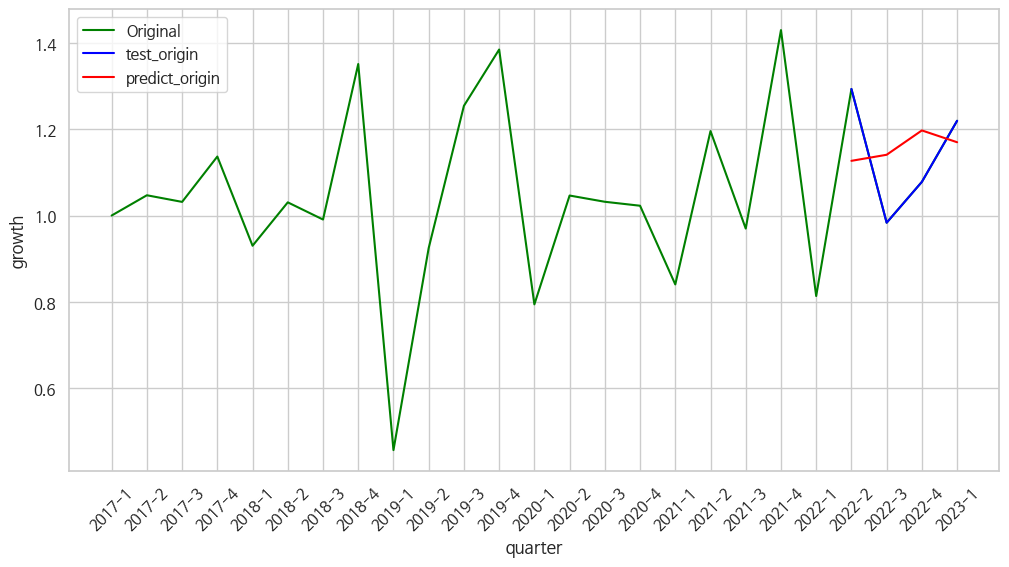

In [95]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [96]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.015112
std      0.150895
min     -0.157476
25%     -0.128787
50%     -0.034758
75%      0.078917
max      0.166546
dtype: float64

In [97]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 25ms/step
[[0.6914521]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.1294301748275757 


### 시장성

In [98]:
### X / y 데이터 생성
X = ap_wfood[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_wfood.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.549982e+10  1.000000  0.330033
1   2.669802e+10  1.046989 -0.664452
2   2.754199e+10  1.031612  1.633987
3   3.130825e+10  1.136746 -0.327869
4   2.911591e+10  0.929976 -6.271777
5   3.000590e+10  1.030567  0.692042
6   2.972733e+10  0.990716 -0.347222
7   4.016764e+10  1.351203 -2.142857
8   1.832570e+10  0.456230 -3.321033
9   1.694464e+10  0.924638  0.000000
10  2.125327e+10  1.254277 -1.886792
11  2.943165e+10  1.384806  1.102941
12  2.337046e+10  0.794059 -2.166065
13  2.445358e+10  1.046345 -2.973978
14  2.523324e+10  1.031883  0.000000
15  2.580646e+10  1.022717  2.536232
16  2.168502e+10  0.840294  2.816901
17  2.592998e+10  1.195756  4.054054
18  2.514588e+10  0.969761  4.516129
19  3.595441e+10  1.429833  0.961538
20  2.924578e+10  0.813413  2.187500
21  3.782485e+10  1.293344  2.476780
22  3.719659e+10  0.983390  1.223242
23  4.009988e+10  1.078052  1.506024
24  2.630619e+10  1.219619  0.593914
--------------------------------------

In [99]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [100]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.99708207 0.63868141 0.72097412]
 [0.40311552 0.78408571 0.63642484]]


In [101]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [102]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2652
Epoch 1: val_loss improved from inf to 0.70747, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2652 - val_loss: 0.7075
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2641
Epoch 2: val_loss improved from 0.70747 to 0.70528, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2641 - val_loss: 0.7053
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2631
Epoch 3: val_loss improved from 0.70528 to 0.70309, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.2631 - val_loss: 0.7031
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2620
Epoch 4: val_loss improved from 0.70309 to 0.70091, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2620 - val_loss: 0.7009
Epoch 5/300
1/1 [================

In [104]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 834ms/step
[[0.50068516]
 [0.46820706]
 [0.52305675]
 [0.47566107]]


In [105]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,1.000000,0.500685
2022-3,0.933032,0.468207
2022-4,0.980793,0.523057
2023-1,0.423296,0.475661


In [106]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 5].values       # 시장성이 ap_wfood의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,1.000000,0.500685,4.462166e+07,18292230.0,2.632943e+07
2022-3,0.933032,0.468207,4.109036e+07,16579623.0,2.451073e+07
2022-4,0.980793,0.523057,4.360884e+07,19471908.0,2.413693e+07
2023-1,0.423296,0.475661,1.421141e+07,16972682.0,-2.761271e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


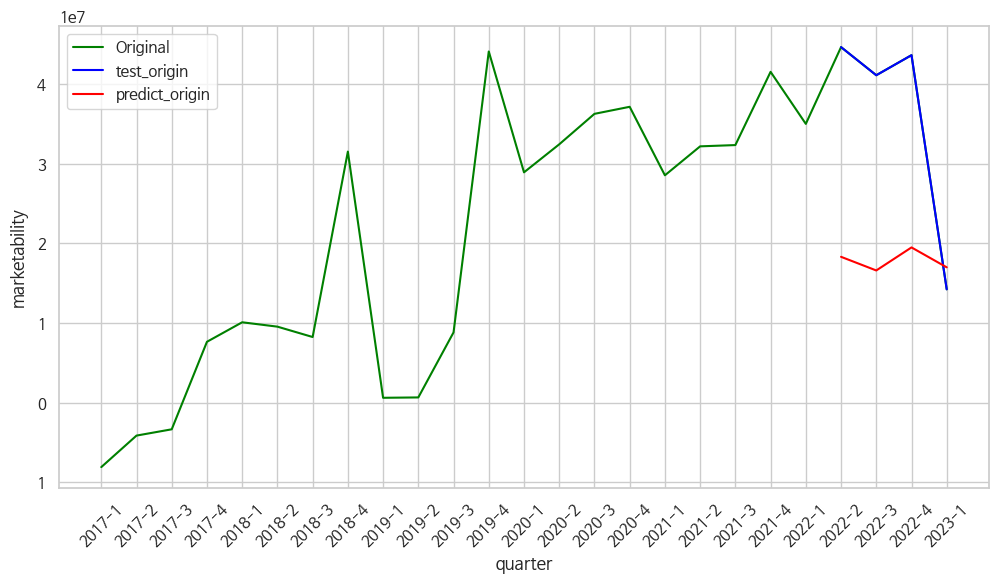

In [107]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [108]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.805396e+07
std      1.390983e+07
min     -2.761271e+06
25%      1.741238e+07
50%      2.432383e+07
75%      2.496541e+07
max      2.632943e+07
dtype: float64

In [109]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 24ms/step
[[0.48319495]]
--------------------------------------------------------------------------------
예측된 시장성  : 17369952.0 


### 순점포증감률

In [110]:
### X / y 데이터 생성
X = ap_wfood[['분기당_매출_금액', '성장성', '시장성']]
y = ap_wfood.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.549982e+10  1.000000 -8.109460e+06
1   2.669802e+10  1.046989 -4.152999e+06
2   2.754199e+10  1.031612 -3.363590e+06
3   3.130825e+10  1.136746  7.623340e+06
4   2.911591e+10  0.929976  1.007280e+07
5   3.000590e+10  1.030567  9.524570e+06
6   2.972733e+10  0.990716  8.223603e+06
7   4.016764e+10  1.351203  3.150104e+07
8   1.832570e+10  0.456230  5.932966e+05
9   1.694464e+10  0.924638  6.383939e+05
10  2.125327e+10  1.254277  8.803695e+06
11  2.943165e+10  1.384806  4.407477e+07
12  2.337046e+10  0.794059  2.889960e+07
13  2.445358e+10  1.046345  3.241585e+07
14  2.523324e+10  1.031883  3.624241e+07
15  2.580646e+10  1.022717  3.712767e+07
16  2.168502e+10  0.840294  2.852631e+07
17  2.592998e+10  1.195756  3.216208e+07
18  2.514588e+10  0.969761  3.232213e+07
19  3.595441e+10  1.429833  4.151689e+07
20  2.924578e+10  0.813413  3.498298e+07
21  3.782485e+10  1.293344  4.462166e+07
22  3.719659e+10  0.983390  4.109036e+07
23  4.009988e+10

In [111]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [112]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.99708207 0.63868141 0.98079263]
 [0.40311552 0.78408571 0.42329596]]


In [113]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [114]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [115]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2916
Epoch 1: val_loss improved from inf to 0.64734, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2916 - val_loss: 0.6473
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2905
Epoch 2: val_loss improved from 0.64734 to 0.64528, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.2905 - val_loss: 0.6453
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2893
Epoch 3: val_loss improved from 0.64528 to 0.64323, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2893 - val_loss: 0.6432
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2882
Epoch 4: val_loss improved from 0.64323 to 0.64119, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.2882 - val_loss: 0.6412
Epoch 5/300
1/1 [================

In [116]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 862ms/step
[[0.6632487 ]
 [0.5793147 ]
 [0.70420796]
 [0.6590466 ]]


In [117]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.810960,0.663249
2022-3,0.694761,0.579315
2022-4,0.720974,0.704208
2023-1,0.636425,0.659047


In [118]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_wfood의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.810960,0.663249,2.476780,0.883288,1.593492
2022-3,0.694761,0.579315,1.223242,-0.022184,1.245426
2022-4,0.720974,0.704208,1.506024,1.325152,0.180872
2023-1,0.636425,0.659047,0.593914,0.837956,-0.244041


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


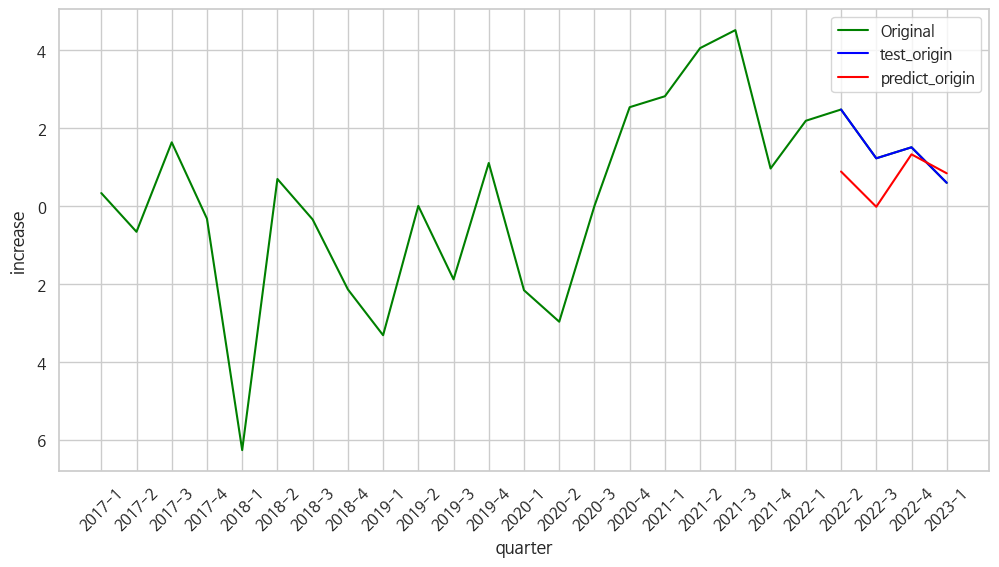

In [119]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [120]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.693937
std      0.867252
min     -0.244041
25%      0.074644
50%      0.713149
75%      1.332443
max      1.593492
dtype: float64

In [121]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 27ms/step
[[0.63059133]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 0.530983030796051 


### 추가


In [122]:
ap_wfood.loc[25] = ['2023-2', '양식음식점수리리', sales, growth, increase, marketability]

<ipython-input-122-8b2f417a3c78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_wfood.loc[25] = ['2023-2', '양식음식점수리리', sales, growth, increase, marketability]


In [123]:
ap_wfood

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,양식음식점,2.549982e+10,1.000000,0.330033,-8.109460e+06
1,2017-2,양식음식점,2.669802e+10,1.046989,-0.664452,-4.152999e+06
2,2017-3,양식음식점,2.754199e+10,1.031612,1.633987,-3.363590e+06
3,2017-4,양식음식점,3.130825e+10,1.136746,-0.327869,7.623340e+06
4,2018-1,양식음식점,2.911591e+10,0.929976,-6.271777,1.007280e+07
5,2018-2,양식음식점,3.000590e+10,1.030567,0.692042,9.524570e+06
6,2018-3,양식음식점,2.972733e+10,0.990716,-0.347222,8.223603e+06
7,2018-4,양식음식점,4.016764e+10,1.351203,-2.142857,3.150104e+07
8,2019-1,양식음식점,1.832570e+10,0.456230,-3.321033,5.932966e+05
9,2019-2,양식음식점,1.694464e+10,0.924638,0.000000,6.383939e+05


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [124]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_wfood[['성장성', '시장성', '순점포증감률']]
y = ap_wfood.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -8.109460e+06  0.330033
1   1.046989 -4.152999e+06 -0.664452
2   1.031612 -3.363590e+06  1.633987
3   1.136746  7.623340e+06 -0.327869
4   0.929976  1.007280e+07 -6.271777
5   1.030567  9.524570e+06  0.692042
6   0.990716  8.223603e+06 -0.347222
7   1.351203  3.150104e+07 -2.142857
8   0.456230  5.932966e+05 -3.321033
9   0.924638  6.383939e+05  0.000000
10  1.254277  8.803695e+06 -1.886792
11  1.384806  4.407477e+07  1.102941
12  0.794059  2.889960e+07 -2.166065
13  1.046345  3.241585e+07 -2.973978
14  1.031883  3.624241e+07  0.000000
15  1.022717  3.712767e+07  2.536232
16  0.840294  2.852631e+07  2.816901
17  1.195756  3.216208e+07  4.054054
18  0.969761  3.232213e+07  4.516129
19  1.429833  4.151689e+07  0.961538
20  0.813413  3.498298e+07  2.187500
21  1.293344  4.462166e+07  2.476780
22  0.983390  4.109036e+07  1.223242
23  1.078052  4.360884e+07  1.506024
24  1.219619  1.421141e+07  0.593914
25  1.129430  1.736995e+07  0.530983
-

In [125]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [126]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.78408571 0.42329596 0.63642484]
 [0.69145207 0.48319495 0.63059133]]


In [127]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [128]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2680
Epoch 1: val_loss improved from inf to 0.33576, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2680 - val_loss: 0.3358
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2669
Epoch 2: val_loss improved from 0.33576 to 0.33418, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2669 - val_loss: 0.3342
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2659
Epoch 3: val_loss improved from 0.33418 to 0.33259, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.2659 - val_loss: 0.3326
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2648
Epoch 4: val_loss improved from 0.33259 to 0.33101, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2648 - val_loss: 0.3310
Epoch 5/300
1/1 [=================

In [130]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 995ms/step
[[0.4813911 ]
 [0.5276814 ]
 [0.4672909 ]
 [0.48869613]]


In [131]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.872064,0.481391
2022-4,0.997082,0.527681
2023-1,0.403116,0.467291
2023-2,0.441522,0.488696


In [132]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_wfood의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.872064,0.481391,3.719659e+10,2.812399e+10,9.072605e+09
2022-4,0.997082,0.527681,4.009988e+10,2.919899e+10,1.090089e+10
2023-1,0.403116,0.467291,2.630619e+10,2.779654e+10,-1.490346e+09
2023-2,0.441522,0.488696,2.719810e+10,2.829363e+10,-1.095528e+09


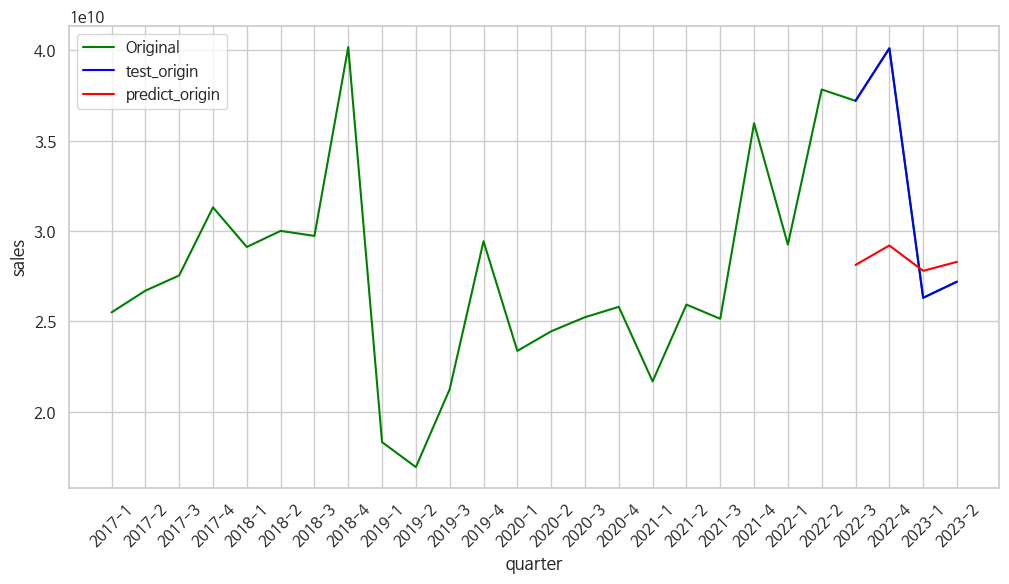

In [133]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [134]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.346906e+09
std      6.556945e+09
min     -1.490346e+09
25%     -1.194233e+09
50%      3.988538e+09
75%      9.529677e+09
max      1.090089e+10
dtype: float64

In [135]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 36ms/step
[[0.48485467]]
--------------------------------------------------------------------------------
예측된 매출  : 28204421120.0 


### 성장성

In [136]:
X = ap_wfood[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_wfood.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.549982e+10 -8.109460e+06  0.330033
1   2.669802e+10 -4.152999e+06 -0.664452
2   2.754199e+10 -3.363590e+06  1.633987
3   3.130825e+10  7.623340e+06 -0.327869
4   2.911591e+10  1.007280e+07 -6.271777
5   3.000590e+10  9.524570e+06  0.692042
6   2.972733e+10  8.223603e+06 -0.347222
7   4.016764e+10  3.150104e+07 -2.142857
8   1.832570e+10  5.932966e+05 -3.321033
9   1.694464e+10  6.383939e+05  0.000000
10  2.125327e+10  8.803695e+06 -1.886792
11  2.943165e+10  4.407477e+07  1.102941
12  2.337046e+10  2.889960e+07 -2.166065
13  2.445358e+10  3.241585e+07 -2.973978
14  2.523324e+10  3.624241e+07  0.000000
15  2.580646e+10  3.712767e+07  2.536232
16  2.168502e+10  2.852631e+07  2.816901
17  2.592998e+10  3.216208e+07  4.054054
18  2.514588e+10  3.232213e+07  4.516129
19  3.595441e+10  4.151689e+07  0.961538
20  2.924578e+10  3.498298e+07  2.187500
21  3.782485e+10  4.462166e+07  2.476780
22  3.719659e+10  4.109036e+07  1.223242
23  4.009988e+10

In [137]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [138]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.40311552 0.42329596 0.63642484]
 [0.44152185 0.48319495 0.63059133]]


In [139]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [140]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [141]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4300
Epoch 1: val_loss improved from inf to 0.49868, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.4300 - val_loss: 0.4987
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4287
Epoch 2: val_loss improved from 0.49868 to 0.49674, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.4287 - val_loss: 0.4967
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4273
Epoch 3: val_loss improved from 0.49674 to 0.49481, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.4273 - val_loss: 0.4948
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4260
Epoch 4: val_loss improved from 0.49481 to 0.49288, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.4260 - val_loss: 0.4929
Epoch 5/300
1/1 [================

In [142]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 966ms/step
[[0.72767234]
 [0.78927845]
 [0.7603089 ]
 [0.71589905]]


In [143]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.541453,0.727672
2022-4,0.638681,0.789278
2023-1,0.784086,0.760309
2023-2,0.691452,0.715899


In [144]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 3].values       # 성장성이 ap_wfood의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.541453,0.727672,0.983390,1.164694,-0.181304
2022-4,0.638681,0.789278,1.078052,1.224674,-0.146622
2023-1,0.784086,0.760309,1.219619,1.196469,0.023149
2023-2,0.691452,0.715899,1.129430,1.153232,-0.023802


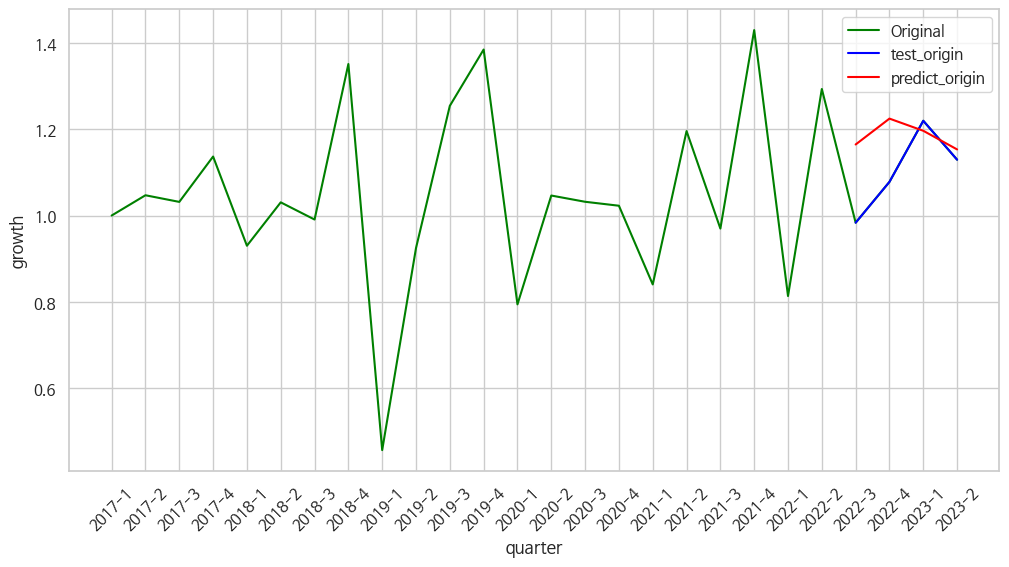

In [145]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [146]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.082144
std      0.097435
min     -0.181304
25%     -0.155292
50%     -0.085212
75%     -0.012064
max      0.023149
dtype: float64

In [147]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 43ms/step
[[0.56251]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0038918256759644 


### 시장성

In [148]:
### X / y 데이터 생성
X = ap_wfood[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_wfood.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.549982e+10  1.000000  0.330033
1   2.669802e+10  1.046989 -0.664452
2   2.754199e+10  1.031612  1.633987
3   3.130825e+10  1.136746 -0.327869
4   2.911591e+10  0.929976 -6.271777
5   3.000590e+10  1.030567  0.692042
6   2.972733e+10  0.990716 -0.347222
7   4.016764e+10  1.351203 -2.142857
8   1.832570e+10  0.456230 -3.321033
9   1.694464e+10  0.924638  0.000000
10  2.125327e+10  1.254277 -1.886792
11  2.943165e+10  1.384806  1.102941
12  2.337046e+10  0.794059 -2.166065
13  2.445358e+10  1.046345 -2.973978
14  2.523324e+10  1.031883  0.000000
15  2.580646e+10  1.022717  2.536232
16  2.168502e+10  0.840294  2.816901
17  2.592998e+10  1.195756  4.054054
18  2.514588e+10  0.969761  4.516129
19  3.595441e+10  1.429833  0.961538
20  2.924578e+10  0.813413  2.187500
21  3.782485e+10  1.293344  2.476780
22  3.719659e+10  0.983390  1.223242
23  4.009988e+10  1.078052  1.506024
24  2.630619e+10  1.219619  0.593914
25  2.719810e+10  1.129430  0.530983
-

In [149]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [150]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.40311552 0.78408571 0.63642484]
 [0.44152185 0.69145207 0.63059133]]


In [151]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [152]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [153]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2971
Epoch 1: val_loss improved from inf to 0.76157, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2971 - val_loss: 0.7616
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2960
Epoch 2: val_loss improved from 0.76157 to 0.75925, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2960 - val_loss: 0.7592
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2948
Epoch 3: val_loss improved from 0.75925 to 0.75694, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2948 - val_loss: 0.7569
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2937
Epoch 4: val_loss improved from 0.75694 to 0.75463, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2937 - val_loss: 0.7546
Epoch 5/300
1/1 [=================

In [154]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 863ms/step
[[0.50494003]
 [0.5703292 ]
 [0.51849145]
 [0.5254789 ]]


In [155]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.933032,0.504940
2022-4,0.980793,0.570329
2023-1,0.423296,0.518491
2023-2,0.483195,0.525479


In [156]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 5].values       # 시장성이 ap_wfood의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.933032,0.504940,4.109036e+07,18516594.0,2.257376e+07
2022-4,0.980793,0.570329,4.360884e+07,21964638.0,2.164420e+07
2023-1,0.423296,0.518491,1.421141e+07,19231176.0,-5.019765e+06
2023-2,0.483195,0.525479,1.736995e+07,19599632.0,-2.229680e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


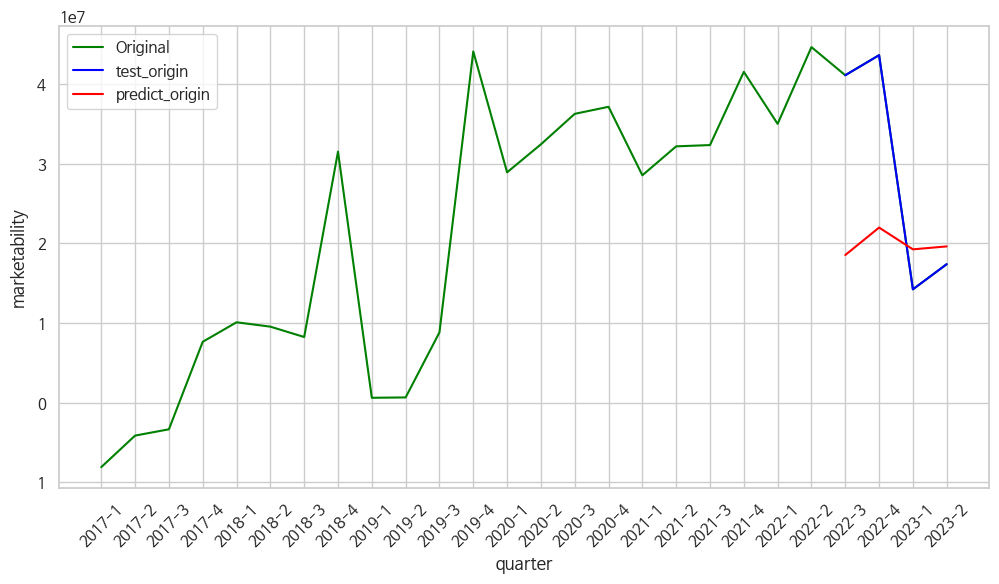

In [157]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [158]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     9.242129e+06
std      1.490579e+07
min     -5.019765e+06
25%     -2.927201e+06
50%      9.707259e+06
75%      2.187659e+07
max      2.257376e+07
dtype: float64

In [159]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 23ms/step
[[0.483136]]
--------------------------------------------------------------------------------
예측된 시장성  : 17366842.0 


### 순점포증감률

In [160]:
### X / y 데이터 생성
X = ap_wfood[['분기당_매출_금액', '성장성', '시장성']]
y = ap_wfood.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.549982e+10  1.000000 -8.109460e+06
1   2.669802e+10  1.046989 -4.152999e+06
2   2.754199e+10  1.031612 -3.363590e+06
3   3.130825e+10  1.136746  7.623340e+06
4   2.911591e+10  0.929976  1.007280e+07
5   3.000590e+10  1.030567  9.524570e+06
6   2.972733e+10  0.990716  8.223603e+06
7   4.016764e+10  1.351203  3.150104e+07
8   1.832570e+10  0.456230  5.932966e+05
9   1.694464e+10  0.924638  6.383939e+05
10  2.125327e+10  1.254277  8.803695e+06
11  2.943165e+10  1.384806  4.407477e+07
12  2.337046e+10  0.794059  2.889960e+07
13  2.445358e+10  1.046345  3.241585e+07
14  2.523324e+10  1.031883  3.624241e+07
15  2.580646e+10  1.022717  3.712767e+07
16  2.168502e+10  0.840294  2.852631e+07
17  2.592998e+10  1.195756  3.216208e+07
18  2.514588e+10  0.969761  3.232213e+07
19  3.595441e+10  1.429833  4.151689e+07
20  2.924578e+10  0.813413  3.498298e+07
21  3.782485e+10  1.293344  4.462166e+07
22  3.719659e+10  0.983390  4.109036e+07
23  4.009988e+10

In [161]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [162]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.40311552 0.78408571 0.42329596]
 [0.44152185 0.69145207 0.48319495]]


In [163]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [164]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [165]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2772
Epoch 1: val_loss improved from inf to 0.72314, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2772 - val_loss: 0.7231
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2761
Epoch 2: val_loss improved from 0.72314 to 0.72087, saving model to stock_model.h5
1/1 [==============================] - 0s 122ms/step - loss: 0.2761 - val_loss: 0.7209
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2750
Epoch 3: val_loss improved from 0.72087 to 0.71860, saving model to stock_model.h5
1/1 [==============================] - 0s 114ms/step - loss: 0.2750 - val_loss: 0.7186
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2739
Epoch 4: val_loss improved from 0.71860 to 0.71634, saving model to stock_model.h5
1/1 [==============================] - 0s 131ms/step - loss: 0.2739 - val_loss: 0.7163
Epoch 5/300
1/1 [==============

In [166]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 869ms/step
[[0.52973783]
 [0.641296  ]
 [0.60203826]
 [0.57740486]]


In [167]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.694761,0.529738
2022-4,0.720974,0.641296
2023-1,0.636425,0.602038
2023-2,0.630591,0.577405


In [168]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_wfood의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.694761,0.529738,1.223242,-0.557015,1.780257
2022-4,0.720974,0.641296,1.506024,0.646464,0.859560
2023-1,0.636425,0.602038,0.593914,0.222955,0.370959
2023-2,0.630591,0.577405,0.530983,-0.042788,0.573771


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


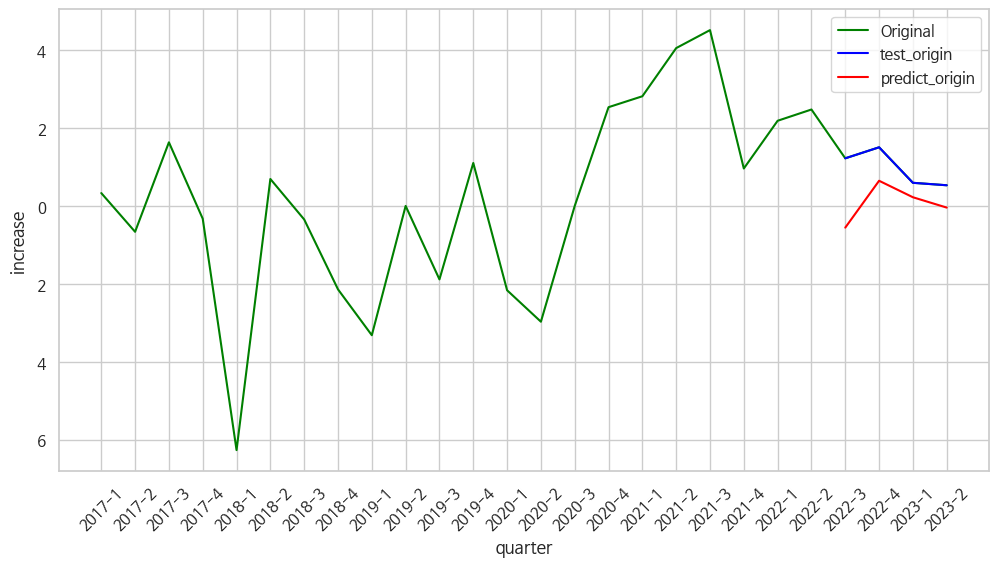

In [169]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [170]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.896137
std      0.622558
min      0.370959
25%      0.523068
50%      0.716665
75%      1.089734
max      1.780257
dtype: float64

In [171]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 29ms/step
[[0.45613015]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.3510878086090088 


### 추가

In [172]:
ap_wfood.loc[26] = ['2023-3', '양식음식점', sales, growth, increase, marketability]

<ipython-input-172-c384ee5eaa5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_wfood.loc[26] = ['2023-3', '양식음식점', sales, growth, increase, marketability]


In [173]:
ap_wfood

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,양식음식점,2.549982e+10,1.000000,0.330033,-8.109460e+06
1,2017-2,양식음식점,2.669802e+10,1.046989,-0.664452,-4.152999e+06
2,2017-3,양식음식점,2.754199e+10,1.031612,1.633987,-3.363590e+06
3,2017-4,양식음식점,3.130825e+10,1.136746,-0.327869,7.623340e+06
4,2018-1,양식음식점,2.911591e+10,0.929976,-6.271777,1.007280e+07
5,2018-2,양식음식점,3.000590e+10,1.030567,0.692042,9.524570e+06
6,2018-3,양식음식점,2.972733e+10,0.990716,-0.347222,8.223603e+06
7,2018-4,양식음식점,4.016764e+10,1.351203,-2.142857,3.150104e+07
8,2019-1,양식음식점,1.832570e+10,0.456230,-3.321033,5.932966e+05
9,2019-2,양식음식점,1.694464e+10,0.924638,0.000000,6.383939e+05


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [174]:
### X / y 데이터 생성
X = ap_wfood[['성장성', '시장성', '순점포증감률']]
y = ap_wfood.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -8.109460e+06  0.330033
1   1.046989 -4.152999e+06 -0.664452
2   1.031612 -3.363590e+06  1.633987
3   1.136746  7.623340e+06 -0.327869
4   0.929976  1.007280e+07 -6.271777
5   1.030567  9.524570e+06  0.692042
6   0.990716  8.223603e+06 -0.347222
7   1.351203  3.150104e+07 -2.142857
8   0.456230  5.932966e+05 -3.321033
9   0.924638  6.383939e+05  0.000000
10  1.254277  8.803695e+06 -1.886792
11  1.384806  4.407477e+07  1.102941
12  0.794059  2.889960e+07 -2.166065
13  1.046345  3.241585e+07 -2.973978
14  1.031883  3.624241e+07  0.000000
15  1.022717  3.712767e+07  2.536232
16  0.840294  2.852631e+07  2.816901
17  1.195756  3.216208e+07  4.054054
18  0.969761  3.232213e+07  4.516129
19  1.429833  4.151689e+07  0.961538
20  0.813413  3.498298e+07  2.187500
21  1.293344  4.462166e+07  2.476780
22  0.983390  4.109036e+07  1.223242
23  1.078052  4.360884e+07  1.506024
24  1.219619  1.421141e+07  0.593914
25  1.129430  1.736995e+07  0.530983
2

In [175]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [176]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.69145207 0.48319495 0.63059133]
 [0.56251004 0.48313597 0.45613015]]


In [177]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [178]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [179]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2680
Epoch 1: val_loss improved from inf to 0.39184, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2680 - val_loss: 0.3918
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2669
Epoch 2: val_loss improved from 0.39184 to 0.39012, saving model to stock_model.h5
1/1 [==============================] - 0s 136ms/step - loss: 0.2669 - val_loss: 0.3901
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2659
Epoch 3: val_loss improved from 0.39012 to 0.38841, saving model to stock_model.h5
1/1 [==============================] - 0s 134ms/step - loss: 0.2659 - val_loss: 0.3884
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2648
Epoch 4: val_loss improved from 0.38841 to 0.38670, saving model to stock_model.h5
1/1 [==============================] - 0s 136ms/step - loss: 0.2648 - val_loss: 0.3867
Epoch 5/300
1/1 [==============

In [180]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 862ms/step
[[0.52786434]
 [0.46752957]
 [0.48867336]
 [0.48433062]]


In [181]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.997082,0.527864
2023-1,0.403116,0.467530
2023-2,0.441522,0.488673
2023-3,0.484855,0.484331


In [182]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_wfood의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.997082,0.527864,4.009988e+10,2.920324e+10,1.089664e+10
2023-1,0.403116,0.467530,2.630619e+10,2.780208e+10,-1.495888e+09
2023-2,0.441522,0.488673,2.719810e+10,2.829310e+10,-1.095000e+09
2023-3,0.484855,0.484331,2.820442e+10,2.819225e+10,1.216922e+07


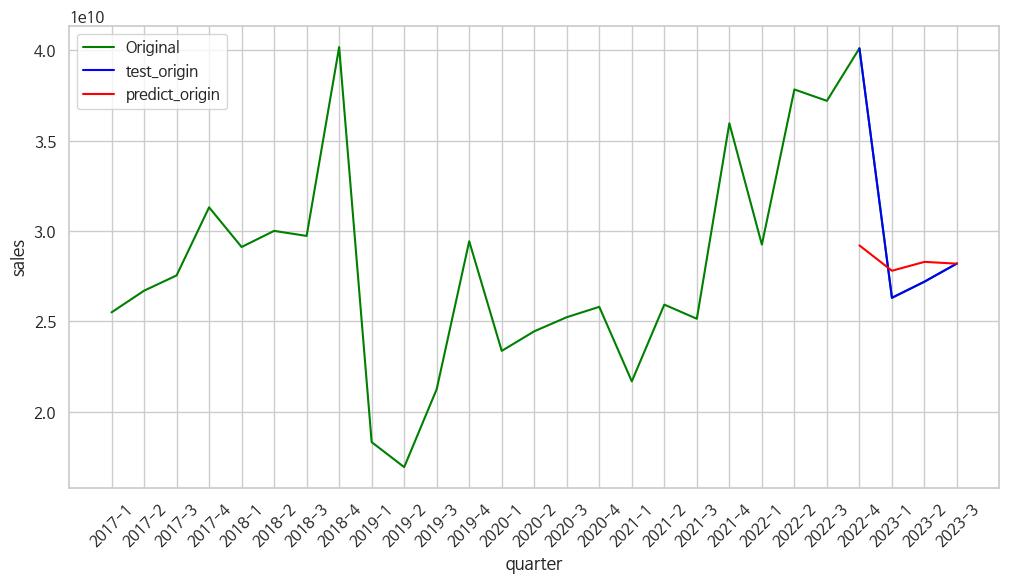

In [183]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [184]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.079481e+09
std      5.912606e+09
min     -1.495888e+09
25%     -1.195222e+09
50%     -5.414154e+08
75%      2.733288e+09
max      1.089664e+10
dtype: float64

In [185]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 24ms/step
[[0.4454072]]
--------------------------------------------------------------------------------
예측된 매출  : 27288332288.0 


### 성장성

In [186]:
X = ap_wfood[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_wfood.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.549982e+10 -8.109460e+06  0.330033
1   2.669802e+10 -4.152999e+06 -0.664452
2   2.754199e+10 -3.363590e+06  1.633987
3   3.130825e+10  7.623340e+06 -0.327869
4   2.911591e+10  1.007280e+07 -6.271777
5   3.000590e+10  9.524570e+06  0.692042
6   2.972733e+10  8.223603e+06 -0.347222
7   4.016764e+10  3.150104e+07 -2.142857
8   1.832570e+10  5.932966e+05 -3.321033
9   1.694464e+10  6.383939e+05  0.000000
10  2.125327e+10  8.803695e+06 -1.886792
11  2.943165e+10  4.407477e+07  1.102941
12  2.337046e+10  2.889960e+07 -2.166065
13  2.445358e+10  3.241585e+07 -2.973978
14  2.523324e+10  3.624241e+07  0.000000
15  2.580646e+10  3.712767e+07  2.536232
16  2.168502e+10  2.852631e+07  2.816901
17  2.592998e+10  3.216208e+07  4.054054
18  2.514588e+10  3.232213e+07  4.516129
19  3.595441e+10  4.151689e+07  0.961538
20  2.924578e+10  3.498298e+07  2.187500
21  3.782485e+10  4.462166e+07  2.476780
22  3.719659e+10  4.109036e+07  1.223242
23  4.009988e+10

In [187]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [188]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.44152185 0.48319495 0.63059133]
 [0.48485464 0.48313597 0.45613015]]


In [189]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [190]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [191]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4300
Epoch 1: val_loss improved from inf to 0.48149, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4300 - val_loss: 0.4815
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4287
Epoch 2: val_loss improved from 0.48149 to 0.47956, saving model to stock_model.h5
1/1 [==============================] - 0s 132ms/step - loss: 0.4287 - val_loss: 0.4796
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4273
Epoch 3: val_loss improved from 0.47956 to 0.47764, saving model to stock_model.h5
1/1 [==============================] - 0s 125ms/step - loss: 0.4273 - val_loss: 0.4776
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4260
Epoch 4: val_loss improved from 0.47764 to 0.47572, saving model to stock_model.h5
1/1 [==============================] - 0s 145ms/step - loss: 0.4260 - val_loss: 0.4757
Epoch 5/300
1/1 [==============

In [192]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 886ms/step
[[0.7622006 ]
 [0.7346648 ]
 [0.6912321 ]
 [0.54336095]]


In [193]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.638681,0.762201
2023-1,0.784086,0.734665
2023-2,0.691452,0.691232
2023-3,0.562510,0.543361


In [194]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 3].values       # 성장성이 ap_wfood의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.638681,0.762201,1.078052,1.198311,-0.120259
2023-1,0.784086,0.734665,1.219619,1.171502,0.048116
2023-2,0.691452,0.691232,1.129430,1.129216,0.000214
2023-3,0.562510,0.543361,1.003892,0.985248,0.018644


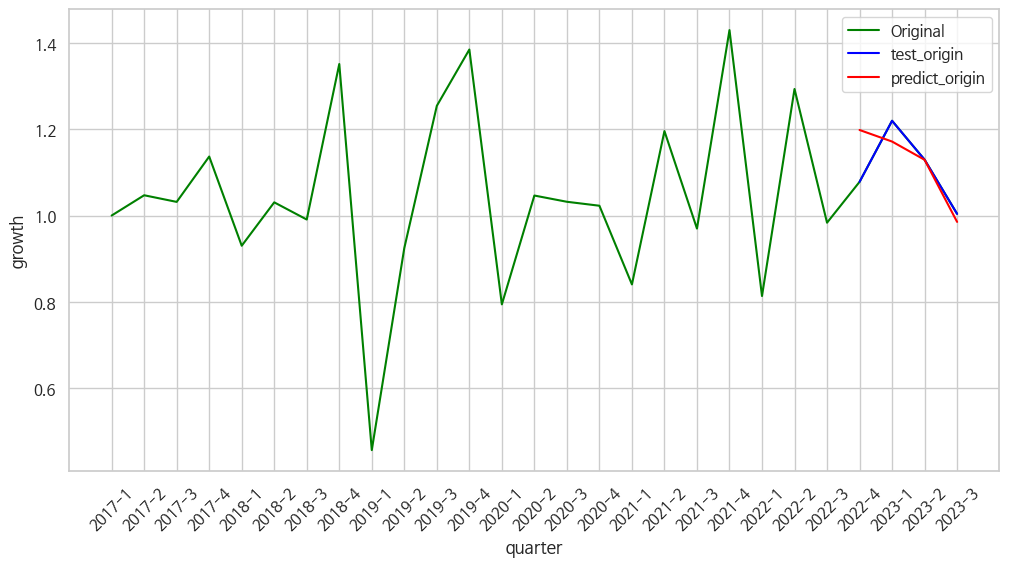

In [195]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [196]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.013321
std      0.073971
min     -0.120259
25%     -0.029904
50%      0.009429
75%      0.026012
max      0.048116
dtype: float64

In [197]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 27ms/step
[[0.5332306]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9753852486610413 


###시장성

In [198]:
### X / y 데이터 생성
X = ap_wfood[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_wfood.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.549982e+10  1.000000  0.330033
1   2.669802e+10  1.046989 -0.664452
2   2.754199e+10  1.031612  1.633987
3   3.130825e+10  1.136746 -0.327869
4   2.911591e+10  0.929976 -6.271777
5   3.000590e+10  1.030567  0.692042
6   2.972733e+10  0.990716 -0.347222
7   4.016764e+10  1.351203 -2.142857
8   1.832570e+10  0.456230 -3.321033
9   1.694464e+10  0.924638  0.000000
10  2.125327e+10  1.254277 -1.886792
11  2.943165e+10  1.384806  1.102941
12  2.337046e+10  0.794059 -2.166065
13  2.445358e+10  1.046345 -2.973978
14  2.523324e+10  1.031883  0.000000
15  2.580646e+10  1.022717  2.536232
16  2.168502e+10  0.840294  2.816901
17  2.592998e+10  1.195756  4.054054
18  2.514588e+10  0.969761  4.516129
19  3.595441e+10  1.429833  0.961538
20  2.924578e+10  0.813413  2.187500
21  3.782485e+10  1.293344  2.476780
22  3.719659e+10  0.983390  1.223242
23  4.009988e+10  1.078052  1.506024
24  2.630619e+10  1.219619  0.593914
25  2.719810e+10  1.129430  0.530983
2

In [199]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [200]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.44152185 0.69145207 0.63059133]
 [0.48485464 0.56251004 0.45613015]]


In [201]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [202]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [203]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2971
Epoch 1: val_loss improved from inf to 0.78065, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2971 - val_loss: 0.7807
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2960
Epoch 2: val_loss improved from 0.78065 to 0.77829, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.2960 - val_loss: 0.7783
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2948
Epoch 3: val_loss improved from 0.77829 to 0.77593, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.2948 - val_loss: 0.7759
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2937
Epoch 4: val_loss improved from 0.77593 to 0.77358, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.2937 - val_loss: 0.7736
Epoch 5/300
1/1 [================

In [204]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 852ms/step
[[0.5703292 ]
 [0.51849145]
 [0.5254789 ]
 [0.4831359 ]]


In [205]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.980793,0.570329
2023-1,0.423296,0.518491
2023-2,0.483195,0.525479
2023-3,0.483136,0.483136


In [206]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 5].values       # 시장성이 ap_wfood의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.980793,0.570329,4.360884e+07,21964638.0,2.164420e+07
2023-1,0.423296,0.518491,1.421141e+07,19231176.0,-5.019765e+06
2023-2,0.483195,0.525479,1.736995e+07,19599632.0,-2.229680e+06
2023-3,0.483136,0.483136,1.736684e+07,17366838.0,4.000000e+00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


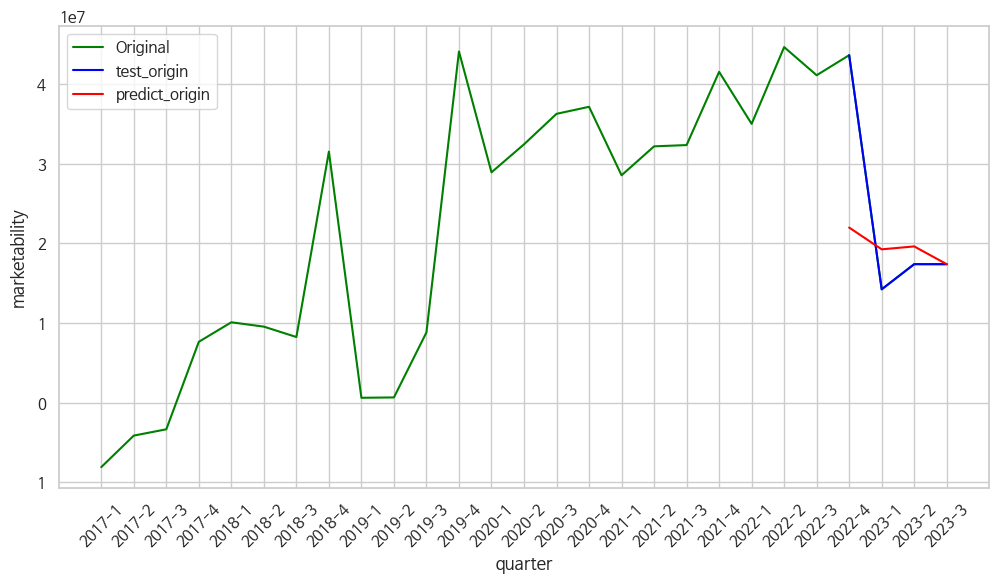

In [207]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [208]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.598689e+06
std      1.220435e+07
min     -5.019765e+06
25%     -2.927201e+06
50%     -1.114838e+06
75%      5.411053e+06
max      2.164420e+07
dtype: float64

In [209]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 25ms/step
[[0.4523501]]
--------------------------------------------------------------------------------
예측된 시장성  : 15743468.0 


### 순점포증감률

In [210]:
### X / y 데이터 생성
X = ap_wfood[['분기당_매출_금액', '성장성', '시장성']]
y = ap_wfood.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.549982e+10  1.000000 -8.109460e+06
1   2.669802e+10  1.046989 -4.152999e+06
2   2.754199e+10  1.031612 -3.363590e+06
3   3.130825e+10  1.136746  7.623340e+06
4   2.911591e+10  0.929976  1.007280e+07
5   3.000590e+10  1.030567  9.524570e+06
6   2.972733e+10  0.990716  8.223603e+06
7   4.016764e+10  1.351203  3.150104e+07
8   1.832570e+10  0.456230  5.932966e+05
9   1.694464e+10  0.924638  6.383939e+05
10  2.125327e+10  1.254277  8.803695e+06
11  2.943165e+10  1.384806  4.407477e+07
12  2.337046e+10  0.794059  2.889960e+07
13  2.445358e+10  1.046345  3.241585e+07
14  2.523324e+10  1.031883  3.624241e+07
15  2.580646e+10  1.022717  3.712767e+07
16  2.168502e+10  0.840294  2.852631e+07
17  2.592998e+10  1.195756  3.216208e+07
18  2.514588e+10  0.969761  3.232213e+07
19  3.595441e+10  1.429833  4.151689e+07
20  2.924578e+10  0.813413  3.498298e+07
21  3.782485e+10  1.293344  4.462166e+07
22  3.719659e+10  0.983390  4.109036e+07
23  4.009988e+10

In [211]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [212]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.44152185 0.69145207 0.48319495]
 [0.48485464 0.56251004 0.48313597]]


In [213]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [214]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [215]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2772
Epoch 1: val_loss improved from inf to 0.70171, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2772 - val_loss: 0.7017
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2761
Epoch 2: val_loss improved from 0.70171 to 0.69945, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2761 - val_loss: 0.6995
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2750
Epoch 3: val_loss improved from 0.69945 to 0.69720, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.2750 - val_loss: 0.6972
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2739
Epoch 4: val_loss improved from 0.69720 to 0.69496, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2739 - val_loss: 0.6950
Epoch 5/300
1/1 [=================

In [216]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.641296  ]
 [0.60203826]
 [0.57740486]
 [0.4561302 ]]


In [217]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.720974,0.641296
2023-1,0.636425,0.602038
2023-2,0.630591,0.577405
2023-3,0.456130,0.456130


In [218]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_wfood의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.720974,0.641296,1.506024,0.646464,8.595598e-01
2023-1,0.636425,0.602038,0.593914,0.222955,3.709592e-01
2023-2,0.630591,0.577405,0.530983,-0.042788,5.737707e-01
2023-3,0.456130,0.456130,-1.351088,-1.351087,-7.152557e-07


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


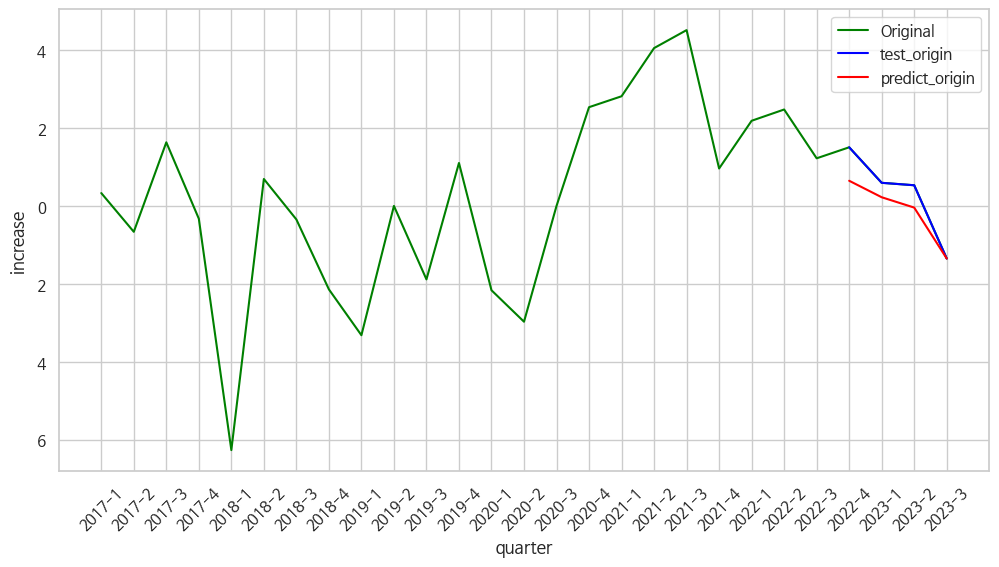

In [219]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_wfood['분기'], ap_wfood['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [220]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.510722e-01
std      3.613871e-01
min     -7.152557e-07
25%      2.782192e-01
50%      4.723649e-01
75%      6.452180e-01
max      8.595598e-01
dtype: float64

In [221]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 24ms/step
[[0.45110646]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.4052828550338745 


### 추가

In [222]:
ap_wfood.loc[27] = ['2023-4', '양식음식점', sales, growth, increase, marketability]

<ipython-input-222-31d0bdadbbd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_wfood.loc[27] = ['2023-4', '양식음식점', sales, growth, increase, marketability]


In [223]:
final_ap_wfood = ap_wfood
final_ap_wfood

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,양식음식점,2.549982e+10,1.000000,0.330033,-8.109460e+06
1,2017-2,양식음식점,2.669802e+10,1.046989,-0.664452,-4.152999e+06
2,2017-3,양식음식점,2.754199e+10,1.031612,1.633987,-3.363590e+06
3,2017-4,양식음식점,3.130825e+10,1.136746,-0.327869,7.623340e+06
4,2018-1,양식음식점,2.911591e+10,0.929976,-6.271777,1.007280e+07
5,2018-2,양식음식점,3.000590e+10,1.030567,0.692042,9.524570e+06
6,2018-3,양식음식점,2.972733e+10,0.990716,-0.347222,8.223603e+06
7,2018-4,양식음식점,4.016764e+10,1.351203,-2.142857,3.150104e+07
8,2019-1,양식음식점,1.832570e+10,0.456230,-3.321033,5.932966e+05
9,2019-2,양식음식점,1.694464e+10,0.924638,0.000000,6.383939e+05


## 최종결과

In [224]:
### X / y 데이터 생성
X = ap_wfood[['성장성', '시장성', '순점포증감률']]
y = ap_wfood.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -8.109460e+06  0.330033
1   1.046989 -4.152999e+06 -0.664452
2   1.031612 -3.363590e+06  1.633987
3   1.136746  7.623340e+06 -0.327869
4   0.929976  1.007280e+07 -6.271777
5   1.030567  9.524570e+06  0.692042
6   0.990716  8.223603e+06 -0.347222
7   1.351203  3.150104e+07 -2.142857
8   0.456230  5.932966e+05 -3.321033
9   0.924638  6.383939e+05  0.000000
10  1.254277  8.803695e+06 -1.886792
11  1.384806  4.407477e+07  1.102941
12  0.794059  2.889960e+07 -2.166065
13  1.046345  3.241585e+07 -2.973978
14  1.031883  3.624241e+07  0.000000
15  1.022717  3.712767e+07  2.536232
16  0.840294  2.852631e+07  2.816901
17  1.195756  3.216208e+07  4.054054
18  0.969761  3.232213e+07  4.516129
19  1.429833  4.151689e+07  0.961538
20  0.813413  3.498298e+07  2.187500
21  1.293344  4.462166e+07  2.476780
22  0.983390  4.109036e+07  1.223242
23  1.078052  4.360884e+07  1.506024
24  1.219619  1.421141e+07  0.593914
25  1.129430  1.736995e+07  0.530983
2

In [225]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [226]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.56251004 0.48313597 0.45613015]
 [0.53323057 0.45235009 0.45110646]]


In [227]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [228]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [229]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2593
Epoch 1: val_loss improved from inf to 0.49610, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2593 - val_loss: 0.4961
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2582
Epoch 2: val_loss improved from 0.49610 to 0.49408, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2582 - val_loss: 0.4941
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2572
Epoch 3: val_loss improved from 0.49408 to 0.49207, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.2572 - val_loss: 0.4921
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2561
Epoch 4: val_loss improved from 0.49207 to 0.49007, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2561 - val_loss: 0.4901
Epoch 5/300
1/1 [================

In [230]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 828ms/step
[[0.47506902]
 [0.49402252]
 [0.48387054]
 [0.44628087]]


In [231]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_wfood.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.403116,0.475069
2023-2,0.441522,0.494023
2023-3,0.484855,0.483871
2023-4,0.445407,0.446281


In [232]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_wfood.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_wfood의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.403116,0.475069,2.630619e+10,2.797717e+10,-1.670975e+09
2023-2,0.441522,0.494023,2.719810e+10,2.841733e+10,-1.219224e+09
2023-3,0.484855,0.483871,2.820442e+10,2.818157e+10,2.285363e+07
2023-4,0.445407,0.446281,2.728833e+10,2.730862e+10,-2.028954e+07


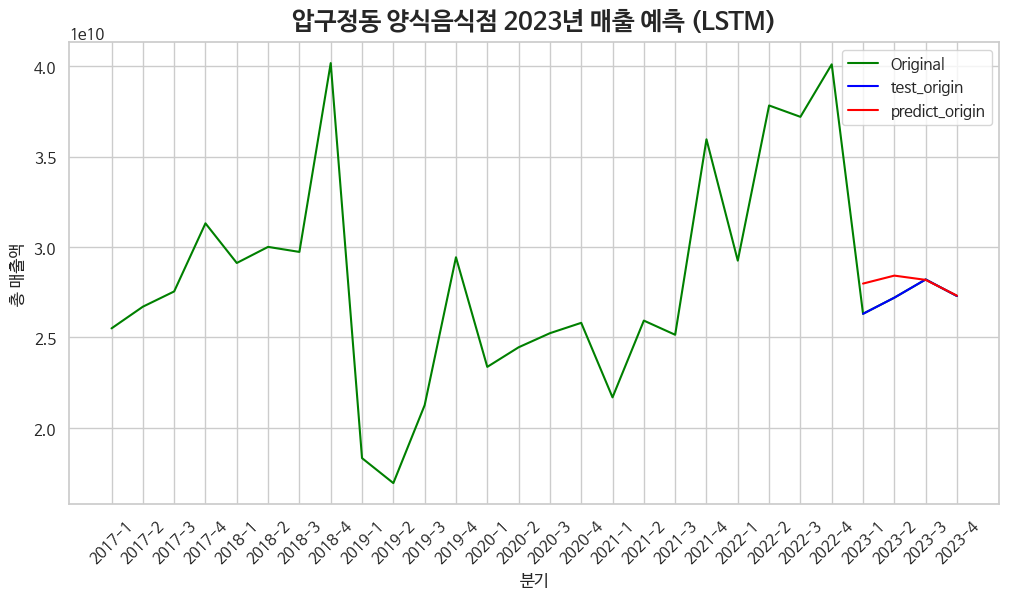

In [233]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 양식음식점 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_wfood['분기'], ap_wfood['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()